In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
!pip install textblob vaderSentiment

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [4]:
import string

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

df['clean_review'] = df['review'].apply(clean_text)

In [5]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return "positive"
    elif score['compound'] < -0.05:
        return "negative"
    else:
        return "neutral"

df['vader_sentiment'] = df['clean_review'].apply(vader_sentiment)
df[['review', 'sentiment', 'vader_sentiment']].head(10)

,review,sentiment,vader_sentiment
0,One of the other reviewers has mentioned that ...,positive,negative
1,A wonderful little production. <br /><br />The...,positive,positive
2,I thought this was a wonderful way to spend ti...,positive,positive
3,Basically there's a family where a little boy ...,negative,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,positive
5,"Probably my all-time favorite movie, a story o...",positive,positive
6,I sure would like to see a resurrection of a u...,positive,positive
7,"This show was an amazing, fresh & innovative i...",negative,positive
8,Encouraged by the positive comments about this...,negative,positive
9,If you like original gut wrenching laughter yo...,positive,positive


In [6]:
from sklearn.metrics import classification_report

print(classification_report(df['sentiment'], df['vader_sentiment']))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.79      0.53      0.63     25000
     neutral       0.00      0.00      0.00         0
    positive       0.65      0.86      0.74     25000

    accuracy                           0.69     50000
   macro avg       0.48      0.46      0.46     50000
weighted avg       0.72      0.69      0.69     50000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


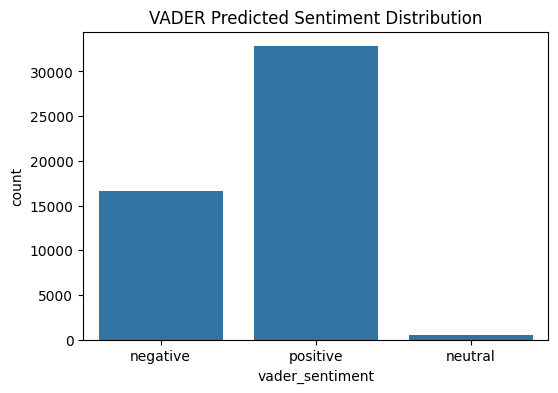

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='vader_sentiment', data=df)
plt.title("VADER Predicted Sentiment Distribution")
plt.show()